# Beef prices

https://data.cso.ie/table/AJM01

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

# user defined - see utils.py
from utils import snake_case_columns, beef_price_lineplot, cso_date_to_datetime

In [2]:
df_beef = pd.read_csv("data/ie/beef_prices_1976-2022_cso.csv")

In [3]:
# value is: Cattle Price per 100 Kg (Euro)
df_beef.head()

,Statistic,Month,Type of Cattle,UNIT,VALUE
0,Cattle Price per 100 Kg,1976M01,Bullocks 200-249kg,Euro,NaN
1,Cattle Price per 100 Kg,1976M01,Bullocks 250-299kg,Euro,NaN
2,Cattle Price per 100 Kg,1976M01,Bullocks 300-349kg,Euro,67.88
3,Cattle Price per 100 Kg,1976M01,Bullocks 350-399kg,Euro,72.34
4,Cattle Price per 100 Kg,1976M01,Bullocks 400-449kg,Euro,71.49


In [4]:
df_beef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7756 entries, 0 to 7755
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Statistic       7756 non-null   object
 1   Month           7756 non-null   object
 2   Type of Cattle  7756 non-null   object
 3   UNIT            7756 non-null   object
 4   VALUE           7561 non-null   object
dtypes: object(5)
memory usage: 303.1+ KB


In [5]:
snake_case_columns(df_beef)

In [6]:
cso_date_to_datetime(df_beef, "month")

In [7]:
df_beef = df_beef[df_beef["month"].dt.year > 1998]

In [8]:
df_beef["type_of_cattle"].unique()

array(['Bullocks 200-249kg', 'Bullocks 250-299kg', 'Bullocks 300-349kg',
       'Bullocks 350-399kg', 'Bullocks 400-449kg', 'Bullocks 450-499kg',
       'Bullocks 500-549kg', 'Bullocks 550kg+', 'Heifers 200-249kg',
       'Heifers 250-299kg', 'Heifers 300-349kg', 'Heifers 350-399kg',
       'Heifers 400-449kg', 'Cows for slaughter'], dtype=object)

In [9]:
df_beef = df_beef[df_beef["type_of_cattle"]!="Cows for slaughter"]

In [10]:
df_beef = df_beef.astype(dtype= {"value":"float64"})

In [11]:
df_beef.head()

,statistic,month,type_of_cattle,unit,value
3864,Cattle Price per 100 Kg,1999-01-31,Bullocks 200-249kg,Euro,136.83
3865,Cattle Price per 100 Kg,1999-01-31,Bullocks 250-299kg,Euro,139.73
3866,Cattle Price per 100 Kg,1999-01-31,Bullocks 300-349kg,Euro,133.33
3867,Cattle Price per 100 Kg,1999-01-31,Bullocks 350-399kg,Euro,131.07
3868,Cattle Price per 100 Kg,1999-01-31,Bullocks 400-449kg,Euro,127.16


In [12]:
df_beef.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3614 entries, 3864 to 7754
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   statistic       3614 non-null   object        
 1   month           3614 non-null   datetime64[ns]
 2   type_of_cattle  3614 non-null   object        
 3   unit            3614 non-null   object        
 4   value           3562 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 169.4+ KB


In [13]:
df_beef.groupby(['type_of_cattle']).count()

,statistic,month,unit,value
type_of_cattle,,,,
Bullocks 200-249kg,278,278,278,274
Bullocks 250-299kg,278,278,278,274
Bullocks 300-349kg,278,278,278,274
Bullocks 350-399kg,278,278,278,274
Bullocks 400-449kg,278,278,278,274
Bullocks 450-499kg,278,278,278,274
Bullocks 500-549kg,278,278,278,274
Bullocks 550kg+,278,278,278,274
Heifers 200-249kg,278,278,278,274


In [14]:
df_beef.isnull().any()

statistic         False
month             False
type_of_cattle    False
unit              False
value              True
dtype: bool

In [15]:
# https://stackoverflow.com/questions/43424199/display-rows-with-one-or-more-nan-values-in-pandas-dataframe
df_beef_na = df_beef[df_beef.isna().any(axis=1)]
print(df_beef_na.count())
#df_beef_na

statistic         52
month             52
type_of_cattle    52
unit              52
value              0
dtype: int64


In [16]:
# forward fill missing values as there is only 52

# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html
cattle_types = df_beef["type_of_cattle"].unique()
for cattle_type in cattle_types:
    df_beef_by_cattle_type = df_beef[df_beef["type_of_cattle"] == cattle_type]
    df_beef_by_cattle_type = df_beef_by_cattle_type.fillna(method="ffill")
    df_beef[df_beef["type_of_cattle"] == cattle_type] = df_beef_by_cattle_type

In [17]:
df_beef.groupby(['type_of_cattle']).count()

,statistic,month,unit,value
type_of_cattle,,,,
Bullocks 200-249kg,278,278,278,278
Bullocks 250-299kg,278,278,278,278
Bullocks 300-349kg,278,278,278,278
Bullocks 350-399kg,278,278,278,278
Bullocks 400-449kg,278,278,278,278
Bullocks 450-499kg,278,278,278,278
Bullocks 500-549kg,278,278,278,278
Bullocks 550kg+,278,278,278,278
Heifers 200-249kg,278,278,278,278


In [18]:
# https://stackoverflow.com/questions/17957890/pandas-select-from-dataframe-using-startswith
df_bullocks = df_beef[df_beef["type_of_cattle"].str.startswith('Bullocks')]

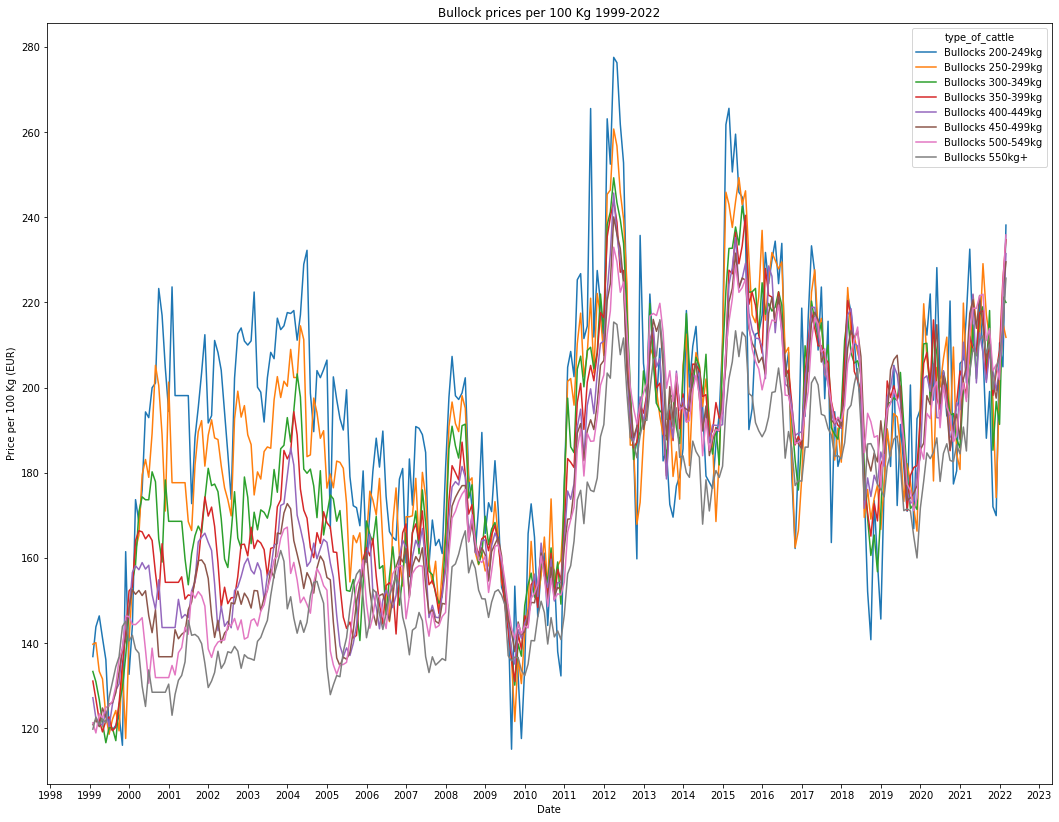

In [19]:
beef_price_lineplot('Bullock prices per 100 Kg 1999-2022', df_bullocks)

In [20]:
df_heifers = df_beef[df_beef["type_of_cattle"].str.startswith('Heifer')]

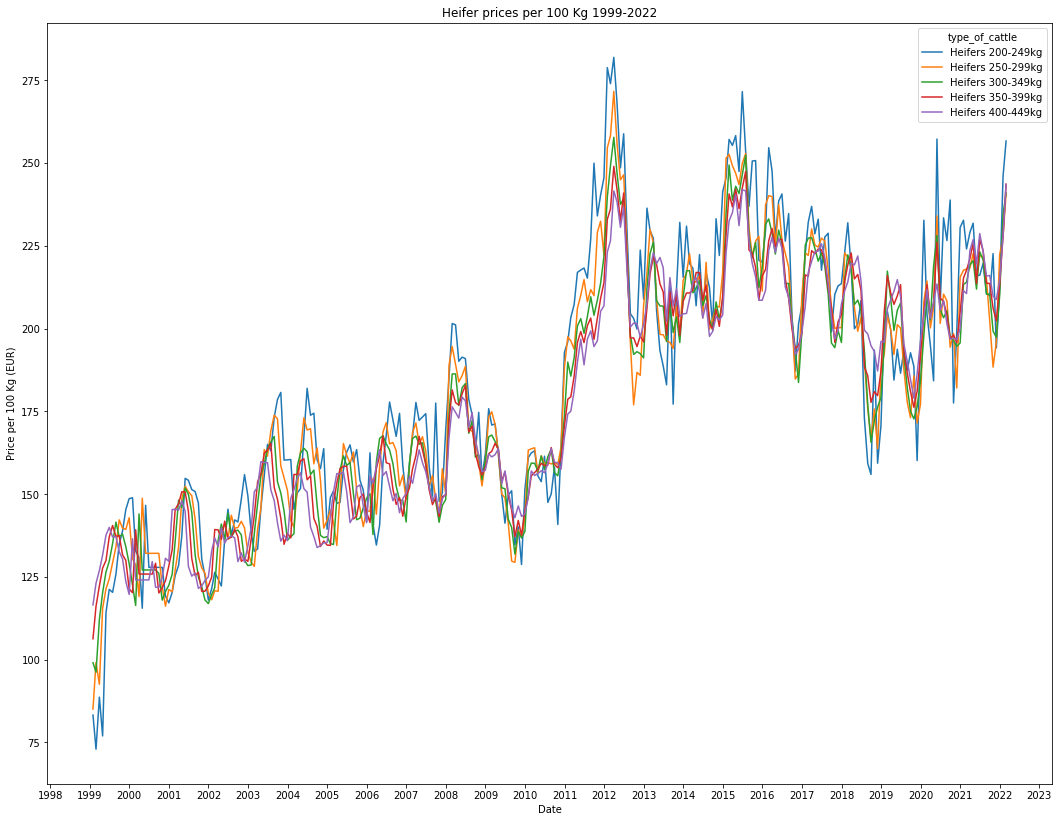

In [21]:
beef_price_lineplot('Heifer prices per 100 Kg 1999-2022', df_heifers)

In [22]:
df_beef.shape

(3614, 5)

In [23]:
df_beef = df_beef.drop(["statistic", "unit"], axis=1)

In [24]:
df_beef_2 = df_beef.pivot(index='month', columns='type_of_cattle', values='value')

In [25]:
snake_case_columns(df_beef_2)

In [26]:
df_beef_2['target_cattle'] = df_beef_2.mean(axis=1)

## final output

In [27]:
df_beef_2

,bullocks_200-249kg,bullocks_250-299kg,bullocks_300-349kg,bullocks_350-399kg,bullocks_400-449kg,bullocks_450-499kg,bullocks_500-549kg,bullocks_550kg+,heifers_200-249kg,heifers_250-299kg,heifers_300-349kg,heifers_350-399kg,heifers_400-449kg,target_cattle
month,,,,,,,,,,,,,,
1999-01-31,136.83,139.73,133.33,131.07,127.16,120.83,121.28,119.78,83.25,85.06,99.08,106.29,116.52,116.939231
1999-02-28,143.80,140.10,130.93,126.85,122.36,121.99,118.89,122.60,72.94,99.15,96.20,116.09,123.06,118.073846
1999-03-31,146.38,133.37,126.74,121.88,121.34,120.37,123.38,120.78,88.66,92.56,112.14,122.24,126.91,119.750000
1999-04-30,141.20,131.58,121.23,119.14,120.69,124.75,122.41,122.15,76.94,115.50,120.22,127.67,131.58,121.158462
1999-05-31,136.09,122.94,116.59,121.77,123.92,122.61,124.88,121.30,114.15,121.35,126.47,129.93,137.58,124.583077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,172.03,196.88,185.30,198.15,203.87,201.15,203.94,199.58,222.61,188.35,199.21,206.13,209.76,198.996923
2021-11-30,169.93,174.18,196.74,203.66,199.36,197.53,205.40,204.63,194.16,195.85,197.39,202.34,208.77,196.149231
2021-12-31,210.53,200.10,191.37,208.82,204.46,203.70,201.86,207.42,211.98,222.36,210.04,213.25,214.67,207.735385


# AGRICULTURAL PRICE INDICES

https://www.cso.ie/en/methods/agricultureandfishing/agriculturalpriceindices/methodology-agriculturalpriceindices/#:~:text=The%20Output%20Price%20Index%20is,of%20the%20average%20farm%20concept

"The Output Price Index is based on the sales of agricultural products and the Input Price Index is based on the purchases of the means of agricultural production by agricultural producers. Both indices are compiled on the basis of the average farm concept. The average farm concept includes both sales to other economic sectors as well as sales/purchases of agricultural output between agricultural units for intermediate consumption purposes, excluding trade in animals between agricultural units."

## df_agri_price_2010

In [28]:
df_agri_price_2010 = pd.read_csv("data/ie/agri_price_index/AHM01_1995M01-2010M12.csv")

In [29]:
snake_case_columns(df_agri_price_2010)

In [30]:
df_agri_price_2010.head()

,statistic,month,agricultural_product,unit,value
0,Agricultural Input and Output Prices Indices,1995M01,Total Index (Output),Base 2000=100,108.3
1,Agricultural Input and Output Prices Indices,1995M01,Total Livestock and Livestock Products (Output),Base 2000=100,108.9
2,Agricultural Input and Output Prices Indices,1995M01,Total Livestock Products (Output),Base 2000=100,102.9
3,Agricultural Input and Output Prices Indices,1995M01,Milk (Output),Base 2000=100,102.6
4,Agricultural Input and Output Prices Indices,1995M01,Total Livestock (Output),Base 2000=100,113.4


In [31]:
df_agri_price_2010.statistic.unique()

array(['Agricultural Input and Output Prices Indices'], dtype=object)

In [32]:
df_agri_price_2010.unit.unique()

array(['Base 2000=100'], dtype=object)

In [33]:
sorted(df_agri_price_2010.agricultural_product.unique())

['All Energy (Input)',
 'All Feeding Stuffs',
 'All Fertilisers  (Input)',
 'Cereals (Output)',
 'Compound Feeding Stuffs - Calf (Input)',
 'Compound Feeding Stuffs - Cattle (Input)',
 'Compound Feeding Stuffs - Pig (Input)',
 'Compound Feeding Stuffs - Poultry (Input)',
 'Compound Fertilisers - N.P.K. (Input)',
 'Compound Fertilisers - P.K. (Input)',
 'Cows for Slaughter (Output)',
 'Energy - Electricity  (Input)',
 'Energy - Motor Fuels  (Input)',
 'Finished Cattle (Output)',
 'Milk (Output)',
 'Other Products  (Input)',
 'Pigs (Output)',
 'Plant Protection Products (Input)',
 'Potatoes (Output)',
 'Poultry (Output)',
 'Seeds  (Input)',
 'Sheep (Output)',
 'Store Cattle (Output)',
 'Straight Feeding Stuffs (Input)',
 'Straight Fertilisers  (Input)',
 'Sugarbeet (Output)',
 'Total Cattle (Output)',
 'Total Crop Products (Output)',
 'Total Index (Input)',
 'Total Index (Output)',
 'Total Livestock (Output)',
 'Total Livestock Products (Output)',
 'Total Livestock and Livestock Products

In [34]:
df_agri_price_2010 = df_agri_price_2010.drop(["statistic", "unit"], axis=1)

In [35]:
cso_date_to_datetime(df_agri_price_2010, "month")

In [36]:
df_agri_price_2010

,month,agricultural_product,value
0,1995-01-31,Total Index (Output),108.300
1,1995-01-31,Total Livestock and Livestock Products (Output),108.900
2,1995-01-31,Total Livestock Products (Output),102.900
3,1995-01-31,Milk (Output),102.600
4,1995-01-31,Total Livestock (Output),113.400
...,...,...,...
6715,2010-12-31,Energy - Electricity (Input),156.855
6716,2010-12-31,Other Products (Input),136.874
6717,2010-12-31,Seeds (Input),123.130
6718,2010-12-31,Plant Protection Products (Input),104.879


In [37]:
# https://pandas.pydata.org/docs/reference/api/pandas.pivot.html
df_agri_price_2010_2 = df_agri_price_2010.pivot(index='month', columns='agricultural_product', values='value')

In [38]:
snake_case_columns(df_agri_price_2010_2)

In [39]:
import re
# https://stackoverflow.com/questions/16720541/python-string-replace-regular-expression
df_agri_price_2010_2.columns = map(lambda x : re.sub(r"[()]", "", x), df_agri_price_2010_2.columns)

In [40]:
df_agri_price_2010_2

,all_energy_input,all_feeding_stuffs,all_fertilisers__input,cereals_output,compound_feeding_stuffs_-_calf_input,compound_feeding_stuffs_-_cattle_input,compound_feeding_stuffs_-_pig_input,compound_feeding_stuffs_-_poultry_input,compound_fertilisers_-_n.p.k._input,compound_fertilisers_-_p.k._input,...,sugarbeet_output,total_cattle_output,total_crop_products_output,total_index_input,total_index_output,total_livestock_output,total_livestock_products_output,total_livestock_and_livestock_products_output,vegetables_output,veterinary_expenses_including_a.i._input
month,,,,,,,,,,,,,,,,,,,,,
1995-01-31,70.400,102.800,94.400,117.000,109.600,105.000,99.200,98.700,96.500,87.300,...,98.7,119.900,104.200,92.400,108.300,113.400,102.900,108.900,88.90,84.900
1995-02-28,70.400,102.300,96.200,117.000,108.200,105.600,98.000,96.200,98.200,88.300,...,98.7,121.500,111.600,92.600,110.300,115.000,103.700,110.100,92.60,85.000
1995-03-31,70.800,103.300,95.600,117.000,108.400,105.500,101.800,97.600,97.400,87.600,...,98.7,123.100,111.400,93.000,110.800,117.000,102.300,110.700,93.10,85.000
1995-04-30,71.000,103.800,95.800,117.000,108.400,105.900,102.000,98.600,97.800,87.400,...,98.7,125.200,110.700,93.300,112.500,118.800,104.800,112.700,92.50,85.600
1995-05-31,72.100,103.500,95.700,117.000,109.100,106.400,98.200,99.600,97.600,86.800,...,98.7,124.200,109.000,93.400,111.700,116.700,106.000,112.100,94.60,85.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-08-31,164.687,126.179,159.859,150.229,123.664,124.960,123.157,130.879,163.765,184.960,...,NaN,119.493,131.110,139.529,115.096,120.244,101.422,112.440,131.28,131.012
2010-09-30,166.558,133.245,164.611,150.229,131.305,131.431,132.508,136.727,168.238,189.341,...,NaN,115.899,139.699,143.216,115.678,116.916,104.321,111.694,128.16,131.012
2010-10-31,165.360,133.963,165.346,150.229,130.620,131.441,136.609,136.106,168.808,189.855,...,NaN,114.611,135.133,143.433,114.294,115.336,104.486,110.838,128.33,130.969


In [41]:
df_agri_price_2010_2.isnull().any()

all_energy_input                                 False
all_feeding_stuffs                               False
all_fertilisers__input                           False
cereals_output                                   False
compound_feeding_stuffs_-_calf_input             False
compound_feeding_stuffs_-_cattle_input           False
compound_feeding_stuffs_-_pig_input              False
compound_feeding_stuffs_-_poultry_input          False
compound_fertilisers_-_n.p.k._input              False
compound_fertilisers_-_p.k._input                False
cows_for_slaughter_output                        False
energy_-_electricity__input                      False
energy_-_motor_fuels__input                      False
finished_cattle_output                           False
milk_output                                      False
other_products__input                            False
pigs_output                                      False
plant_protection_products_input                  False
potatoes_o

In [42]:
df_agri_price_2010_2.sugarbeet_output.isna().sum()

52

In [43]:
df_agri_price_2010_2.sugarbeet_output.isna().count()

192

In [44]:
df_agri_price_2010_2 = df_agri_price_2010_2.drop(["sugarbeet_output"], axis=1)

In [45]:
df_agri_price_2010_2[df_agri_price_2010_2.index.year == 2000]

,all_energy_input,all_feeding_stuffs,all_fertilisers__input,cereals_output,compound_feeding_stuffs_-_calf_input,compound_feeding_stuffs_-_cattle_input,compound_feeding_stuffs_-_pig_input,compound_feeding_stuffs_-_poultry_input,compound_fertilisers_-_n.p.k._input,compound_fertilisers_-_p.k._input,...,straight_fertilisers__input,total_cattle_output,total_crop_products_output,total_index_input,total_index_output,total_livestock_output,total_livestock_products_output,total_livestock_and_livestock_products_output,vegetables_output,veterinary_expenses_including_a.i._input
month,,,,,,,,,,,,,,,,,,,,,
2000-01-31,90.671,98.132,95.772,104.686,98.131,98.460,98.102,97.641,96.258,97.433,...,94.234,92.359,95.665,96.560,95.376,92.159,99.804,95.328,96.39,98.920
2000-02-29,92.235,98.808,96.973,104.686,98.914,98.948,98.929,98.833,97.511,97.907,...,95.590,95.002,96.058,97.403,97.136,96.342,98.689,97.315,98.37,99.088
2000-03-31,95.814,98.899,97.115,104.686,98.738,99.054,99.040,98.894,97.779,97.919,...,95.560,96.261,95.522,98.160,98.034,98.852,97.885,98.451,98.08,99.350
2000-04-30,95.582,98.877,97.569,104.686,98.969,98.919,99.040,98.857,98.027,98.074,...,96.445,98.964,95.913,98.319,99.043,101.504,96.820,99.562,98.31,100.242
2000-05-31,93.856,98.642,98.531,104.686,99.258,98.404,99.119,97.749,98.897,98.356,...,97.761,103.868,101.333,98.050,101.089,103.644,97.383,101.048,101.52,100.244
2000-06-30,97.831,99.524,99.180,104.686,100.096,98.933,99.891,99.924,99.271,98.624,...,98.990,108.912,103.091,99.225,103.032,106.603,97.967,103.022,101.08,100.186
2000-07-31,100.013,99.792,98.883,104.686,100.096,99.670,100.147,99.293,99.128,98.423,...,98.391,106.158,104.172,99.727,102.304,103.891,99.316,101.994,101.57,100.254
2000-08-31,99.964,100.626,98.994,100.000,101.507,100.470,100.425,100.978,99.078,99.255,...,98.695,105.497,97.380,100.213,101.321,102.997,100.530,101.975,103.69,100.363
2000-09-30,108.801,100.619,99.024,99.999,100.500,100.233,100.812,101.265,99.008,100.071,...,98.801,105.144,107.685,101.896,103.570,102.905,102.862,102.887,102.02,100.323


In [46]:
df_agri_price_2010_2[df_agri_price_2010_2.index.year == 2010]

,all_energy_input,all_feeding_stuffs,all_fertilisers__input,cereals_output,compound_feeding_stuffs_-_calf_input,compound_feeding_stuffs_-_cattle_input,compound_feeding_stuffs_-_pig_input,compound_feeding_stuffs_-_poultry_input,compound_fertilisers_-_n.p.k._input,compound_fertilisers_-_p.k._input,...,straight_fertilisers__input,total_cattle_output,total_crop_products_output,total_index_input,total_index_output,total_livestock_output,total_livestock_products_output,total_livestock_and_livestock_products_output,vegetables_output,veterinary_expenses_including_a.i._input
month,,,,,,,,,,,,,,,,,,,,,
2010-01-31,156.234,121.860,160.350,94.623,118.365,117.838,120.293,131.140,164.793,241.160,...,148.168,112.559,133.596,136.544,108.211,113.541,90.529,104.000,136.78,131.806
2010-02-28,155.834,121.708,158.551,94.623,118.906,117.491,120.293,131.104,162.921,202.852,...,150.707,112.894,131.171,136.237,108.446,114.444,90.886,104.677,131.24,131.815
2010-03-31,163.002,121.599,161.613,94.623,119.267,117.446,120.293,130.889,164.721,193.976,...,157.618,113.695,131.875,137.838,110.022,116.042,92.779,106.397,132.93,130.963
2010-04-30,163.541,121.703,162.047,94.623,119.555,117.566,120.293,130.889,164.991,184.178,...,159.570,115.201,133.726,138.032,111.790,118.412,93.664,108.151,135.37,130.996
2010-05-31,167.597,121.626,161.690,94.623,119.555,117.566,120.293,130.420,164.912,184.178,...,158.670,118.160,132.365,138.643,115.463,120.931,100.980,112.659,132.02,130.996
2010-06-30,167.328,121.636,158.733,94.623,119.843,117.604,120.293,130.482,162.517,184.178,...,154.067,120.148,129.679,138.112,115.396,121.453,101.130,113.027,124.36,130.996
2010-07-31,165.335,121.884,158.279,94.623,120.564,118.065,120.293,130.482,162.043,184.178,...,153.856,117.434,124.578,137.810,113.240,118.659,101.054,111.360,133.73,131.012
2010-08-31,164.687,126.179,159.859,150.229,123.664,124.960,123.157,130.879,163.765,184.960,...,155.503,119.493,131.110,139.529,115.096,120.244,101.422,112.440,131.28,131.012
2010-09-30,166.558,133.245,164.611,150.229,131.305,131.431,132.508,136.727,168.238,189.341,...,161.373,115.899,139.699,143.216,115.678,116.916,104.321,111.694,128.16,131.012


In [47]:
# this data is based at 2000, we want to rebase it to 2010 so we can join it with the next dataset / time series for
# agricultural prices indices

# https://stats.stackexchange.com/questions/154577/how-to-work-with-index-numbers#:~:text=Rebasing%20an%20index,multiplying%20the%20result%20by%20100.
df_agri_price_2010_2_rebased = df_agri_price_2010_2 /df_agri_price_2010_2[df_agri_price_2010_2.index.year == 2010].mean() * 100

In [48]:
df_agri_price_2010_2_rebased

,all_energy_input,all_feeding_stuffs,all_fertilisers__input,cereals_output,compound_feeding_stuffs_-_calf_input,compound_feeding_stuffs_-_cattle_input,compound_feeding_stuffs_-_pig_input,compound_feeding_stuffs_-_poultry_input,compound_fertilisers_-_n.p.k._input,compound_fertilisers_-_p.k._input,...,straight_fertilisers__input,total_cattle_output,total_crop_products_output,total_index_input,total_index_output,total_livestock_output,total_livestock_products_output,total_livestock_and_livestock_products_output,vegetables_output,veterinary_expenses_including_a.i._input
month,,,,,,,,,,,,,,,,,,,,,
1995-01-31,42.752496,81.487113,58.205136,99.327488,88.830173,85.404737,78.962922,74.413812,58.215996,45.179476,...,59.823224,102.944891,78.545378,66.049498,95.478509,96.063161,103.716595,98.785889,67.885051,64.753387
1995-02-28,42.752496,81.090775,59.314980,99.327488,87.695481,85.892764,78.007725,72.528964,59.241563,45.696996,...,61.534269,104.318634,84.123456,66.192462,97.241732,97.418550,104.522944,99.874439,70.710413,64.829657
1995-03-31,42.995407,81.883451,58.945032,99.327488,87.857580,85.811426,81.032514,73.584479,58.758944,45.334732,...,61.344153,105.692377,83.972698,66.478391,97.682538,99.112785,103.111834,100.418714,71.092219,64.829657
1995-04-30,43.116863,82.279790,59.068348,99.327488,87.857580,86.136778,81.191714,74.338418,59.000253,45.231228,...,61.217409,107.495415,83.445041,66.692837,99.181277,100.637597,105.631673,102.232963,70.634052,65.287278
1995-05-31,43.784871,82.041987,59.006690,99.327488,88.424926,86.543467,78.166925,75.092358,58.879598,44.920716,...,61.280781,106.636826,82.163591,66.764319,98.475988,98.858650,106.841196,101.688688,72.237636,65.287278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-08-31,100.011083,100.019090,98.565835,127.537343,100.228965,101.639771,98.032627,98.674826,98.795261,95.720457,...,98.545453,102.595445,98.829985,99.738316,101.469940,101.860835,102.226866,101.997111,100.246901,99.923094
2010-09-30,101.147303,105.620140,101.495823,127.537343,106.421951,106.903143,105.475996,103.083863,101.493708,97.987711,...,102.265393,99.509674,105.304326,102.373862,101.983038,99.041627,105.148872,101.320396,97.864434,99.923094
2010-10-31,100.419782,106.189282,101.949009,127.537343,105.866763,106.911277,108.740381,102.615667,101.837574,98.253716,...,102.977695,98.403810,101.862500,102.528979,100.762888,97.703181,105.315182,100.543897,97.994247,99.890298


In [49]:
df_agri_price_2010_2_rebased.shape

(192, 34)

## df_agri_price_2018

In [50]:
df_agri_price_2018 = pd.read_csv("data/ie/agri_price_index/AHM03_2005M01-2018M01.csv")

In [51]:
df_agri_price_2018

,Statistic,Month,Agricultural Product,UNIT,VALUE
0,Agricultural Input and Output Price Indices,2005M01,Agricultural output price index,Base 2010 = 100,94.450
1,Agricultural Input and Output Price Indices,2005M01,Crop output,Base 2010 = 100,79.430
2,Agricultural Input and Output Price Indices,2005M01,Cereals including seeds,Base 2010 = 100,81.500
3,Agricultural Input and Output Price Indices,2005M01,Vegetables,Base 2010 = 100,93.030
4,Agricultural Input and Output Price Indices,2005M01,Potatoes including seeds,Base 2010 = 100,55.920
...,...,...,...,...,...
6432,Agricultural Input and Output Price Indices,2018M01,Compound feeding stuffs for pigs,Base 2010 = 100,124.032
6433,Agricultural Input and Output Price Indices,2018M01,Compound feeding stuffs for poultry,Base 2010 = 100,113.220
6434,Agricultural Input and Output Price Indices,2018M01,Other compound feeding stuffs,Base 2010 = 100,111.416
6435,Agricultural Input and Output Price Indices,2018M01,Maintenance of materials and buildings,Base 2010 = 100,99.157


In [52]:
snake_case_columns(df_agri_price_2018)

In [53]:
df_agri_price_2018.statistic.unique()

array(['Agricultural Input and Output Price Indices'], dtype=object)

In [54]:
df_agri_price_2018.unit.unique()

array(['Base 2010 = 100'], dtype=object)

In [55]:
sorted(df_agri_price_2018.agricultural_product.unique())

['Agricultural input price index',
 'Agricultural output price index',
 'Animal output',
 'Animal products',
 'Animals',
 'Calves',
 'Cattle',
 'Cattle excluding calves',
 'Cereals including seeds',
 'Compound feeding stuffs',
 'Compound feeding stuffs for calves',
 'Compound feeding stuffs for cattle excluding calves',
 'Compound feeding stuffs for pigs',
 'Compound feeding stuffs for poultry',
 'Compound fertilisers',
 'Crop output',
 'Eggs',
 'Electricity',
 'Energy',
 'Feeding stuffs',
 'Fertilisers',
 'Lubricants',
 'Maintenance of materials and buildings',
 'Milk',
 'Motor fuel',
 'NPK fertilisers',
 'Other compound feeding stuffs',
 'Other fertilisers',
 'Other goods and services',
 'PK fertilisers',
 'Pigs',
 'Plant protection products',
 'Potatoes including seeds',
 'Poultry',
 'Seeds',
 'Sheep',
 'Straight feeding stuffs',
 'Straight fertilisers',
 'Vegetables',
 'Veterinary expenses',
 'Wool']

In [56]:
df_agri_price_2018 = df_agri_price_2018.drop(["statistic", "unit"], axis=1)

In [57]:
cso_date_to_datetime(df_agri_price_2018, "month")

In [58]:
df_agri_price_2018

,month,agricultural_product,value
0,2005-01-31,Agricultural output price index,94.450
1,2005-01-31,Crop output,79.430
2,2005-01-31,Cereals including seeds,81.500
3,2005-01-31,Vegetables,93.030
4,2005-01-31,Potatoes including seeds,55.920
...,...,...,...
6432,2018-01-31,Compound feeding stuffs for pigs,124.032
6433,2018-01-31,Compound feeding stuffs for poultry,113.220
6434,2018-01-31,Other compound feeding stuffs,111.416
6435,2018-01-31,Maintenance of materials and buildings,99.157


In [59]:
df_agri_price_2018_2 = df_agri_price_2018.pivot(index='month', columns='agricultural_product', values='value')

In [60]:
snake_case_columns(df_agri_price_2018_2)

In [61]:
df_agri_price_2018_2.columns

Index(['agricultural_input_price_index', 'agricultural_output_price_index',
       'animal_output', 'animal_products', 'animals', 'calves', 'cattle',
       'cattle_excluding_calves', 'cereals_including_seeds',
       'compound_feeding_stuffs', 'compound_feeding_stuffs_for_calves',
       'compound_feeding_stuffs_for_cattle_excluding_calves',
       'compound_feeding_stuffs_for_pigs',
       'compound_feeding_stuffs_for_poultry', 'compound_fertilisers',
       'crop_output', 'eggs', 'electricity', 'energy', 'feeding_stuffs',
       'fertilisers', 'lubricants', 'maintenance_of_materials_and_buildings',
       'milk', 'motor_fuel', 'npk_fertilisers',
       'other_compound_feeding_stuffs', 'other_fertilisers',
       'other_goods_and_services', 'pk_fertilisers', 'pigs',
       'plant_protection_products', 'potatoes_including_seeds', 'poultry',
       'seeds', 'sheep', 'straight_feeding_stuffs', 'straight_fertilisers',
       'vegetables', 'veterinary_expenses', 'wool'],
      dtype='obje

In [62]:
df_agri_price_2018_2.isnull().any()

agricultural_input_price_index                         False
agricultural_output_price_index                        False
animal_output                                          False
animal_products                                        False
animals                                                False
calves                                                 False
cattle                                                 False
cattle_excluding_calves                                False
cereals_including_seeds                                False
compound_feeding_stuffs                                False
compound_feeding_stuffs_for_calves                     False
compound_feeding_stuffs_for_cattle_excluding_calves    False
compound_feeding_stuffs_for_pigs                       False
compound_feeding_stuffs_for_poultry                    False
compound_fertilisers                                   False
crop_output                                            False
eggs                    

In [63]:
df_agri_price_2018_2.columns

Index(['agricultural_input_price_index', 'agricultural_output_price_index',
       'animal_output', 'animal_products', 'animals', 'calves', 'cattle',
       'cattle_excluding_calves', 'cereals_including_seeds',
       'compound_feeding_stuffs', 'compound_feeding_stuffs_for_calves',
       'compound_feeding_stuffs_for_cattle_excluding_calves',
       'compound_feeding_stuffs_for_pigs',
       'compound_feeding_stuffs_for_poultry', 'compound_fertilisers',
       'crop_output', 'eggs', 'electricity', 'energy', 'feeding_stuffs',
       'fertilisers', 'lubricants', 'maintenance_of_materials_and_buildings',
       'milk', 'motor_fuel', 'npk_fertilisers',
       'other_compound_feeding_stuffs', 'other_fertilisers',
       'other_goods_and_services', 'pk_fertilisers', 'pigs',
       'plant_protection_products', 'potatoes_including_seeds', 'poultry',
       'seeds', 'sheep', 'straight_feeding_stuffs', 'straight_fertilisers',
       'vegetables', 'veterinary_expenses', 'wool'],
      dtype='obje

In [111]:
col_names_2010=sorted(df_agri_price_2010_2_rebased.columns)

In [112]:
col_names_2018=sorted(df_agri_price_2018_2.columns)

In [113]:
sorted(col_names_2010)

['all_energy_input',
 'all_feeding_stuffs',
 'all_fertilisers__input',
 'cereals_output',
 'compound_feeding_stuffs_-_calf_input',
 'compound_feeding_stuffs_-_cattle_input',
 'compound_feeding_stuffs_-_pig_input',
 'compound_feeding_stuffs_-_poultry_input',
 'compound_fertilisers_-_n.p.k._input',
 'compound_fertilisers_-_p.k._input',
 'cows_for_slaughter_output',
 'energy_-_electricity__input',
 'energy_-_motor_fuels__input',
 'finished_cattle_output',
 'milk_output',
 'other_products__input',
 'pigs_output',
 'plant_protection_products_input',
 'potatoes_output',
 'poultry_output',
 'seeds__input',
 'sheep_output',
 'store_cattle_output',
 'straight_feeding_stuffs_input',
 'straight_fertilisers__input',
 'total_cattle_output',
 'total_crop_products_output',
 'total_index_input',
 'total_index_output',
 'total_livestock_and_livestock_products_output',
 'total_livestock_output',
 'total_livestock_products_output',
 'vegetables_output',
 'veterinary_expenses_including_a.i._input']

In [114]:
sorted(col_names_2018)

['agricultural_input_price_index',
 'agricultural_output_price_index',
 'animal_output',
 'animal_products',
 'animals',
 'calves',
 'cattle',
 'cattle_excluding_calves',
 'cereals_including_seeds',
 'compound_feeding_stuffs',
 'compound_feeding_stuffs_for_calves',
 'compound_feeding_stuffs_for_cattle_excluding_calves',
 'compound_feeding_stuffs_for_pigs',
 'compound_feeding_stuffs_for_poultry',
 'compound_fertilisers',
 'crop_output',
 'eggs',
 'electricity',
 'energy',
 'feeding_stuffs',
 'fertilisers',
 'lubricants',
 'maintenance_of_materials_and_buildings',
 'milk',
 'motor_fuel',
 'npk_fertilisers',
 'other_compound_feeding_stuffs',
 'other_fertilisers',
 'other_goods_and_services',
 'pigs',
 'pk_fertilisers',
 'plant_protection_products',
 'potatoes_including_seeds',
 'poultry',
 'seeds',
 'sheep',
 'straight_feeding_stuffs',
 'straight_fertilisers',
 'vegetables',
 'veterinary_expenses',
 'wool']

In [124]:
col_names_2010_new = {}
for i in range(len(col_names_2010)):  
    name = col_names_2010[i]
    colname = re.sub(r"[_]{1,2}input|_output|_including_a.i.", "", col_names_2010[i])
    #print(colname,":", name)
    if colname == 'energy_-_electricity':
        col_names_2010_new[name] = 'electricity'
    elif colname == 'energy_-_motor_fuels':
        col_names_2010_new[name] = 'motor_fuel'
    elif colname == 'compound_feeding_stuffs_-_calf':
        col_names_2010_new[name] = 'motor_fuels' 
    elif colname == 'compound_feeding_stuffs_-_cattle':
        col_names_2010_new[name] = 'compound_feeding_stuffs_for_cattle_excluding_calves'
    elif colname == 'compound_feeding_stuffs_-_pig':
        col_names_2010_new[name] = 'compound_feeding_stuffs_for_pigs'
    elif colname == 'compound_feeding_stuffs_-_poultry':
        col_names_2010_new[name] = 'compound_feeding_stuffs_for_poultry'
    elif colname == 'compound_fertilisers_-_n.p.k.':
        col_names_2010_new[name] = 'npk_fertilisers'
    elif colname == 'compound_fertilisers_-_p.k.':
        col_names_2010_new[name] = 'pk_fertilisers'
    elif colname == 'other_products':
        col_names_2010_new[name] = 'other_goods_and_services'
    elif colname == 'total_crop_products':
        col_names_2010_new[name] = 'crop_output'
    elif colname == 'all_fertilisers':
        col_names_2010_new[name] = 'fertilisers'
    elif colname == 'all_feeding_stuffs':
        col_names_2010_new[name] = 'feeding_stuffs'
    elif colname == 'finished_cattle':
        col_names_2010_new[name] = 'cattle'
    else:
        col_names_2010_new[name] = colname

In [125]:
col_names_2018_new = {}
for i in range(len(col_names_2018)): 
    name = col_names_2018[i]
    colname = re.sub(r"[_]{1,2}input|_output|_including_a.i.", "", col_names_2018[i])
    #print(colname,":", name)
    if colname == 'cereals_including_seeds':
        col_names_2018_new[name] = 'cereals'
    elif colname == 'potatoes_including_seeds':
        col_names_2018_new[name] = 'potatoes'

In [126]:
col_names_2010_new

{'all_energy_input': 'all_energy',
 'all_feeding_stuffs': 'feeding_stuffs',
 'all_fertilisers__input': 'fertilisers',
 'cereals_output': 'cereals',
 'compound_feeding_stuffs_-_calf_input': 'motor_fuels',
 'compound_feeding_stuffs_-_cattle_input': 'compound_feeding_stuffs_for_cattle_excluding_calves',
 'compound_feeding_stuffs_-_pig_input': 'compound_feeding_stuffs_for_pigs',
 'compound_feeding_stuffs_-_poultry_input': 'compound_feeding_stuffs_for_poultry',
 'compound_fertilisers_-_n.p.k._input': 'npk_fertilisers',
 'compound_fertilisers_-_p.k._input': 'pk_fertilisers',
 'cows_for_slaughter_output': 'cows_for_slaughter',
 'energy_-_electricity__input': 'electricity',
 'energy_-_motor_fuels__input': 'motor_fuel',
 'finished_cattle_output': 'cattle',
 'milk_output': 'milk',
 'other_products__input': 'other_goods_and_services',
 'pigs_output': 'pigs',
 'plant_protection_products_input': 'plant_protection_products',
 'potatoes_output': 'potatoes',
 'poultry_output': 'poultry',
 'seeds__inpu

In [127]:
col_names_2018_new

{'cereals_including_seeds': 'cereals', 'potatoes_including_seeds': 'potatoes'}

In [128]:
# https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas
df_agri_price_2010_3 = df_agri_price_2010_2_rebased.rename(col_names_2010_new, axis=1)

In [129]:
df_agri_price_2018_3 = df_agri_price_2018_2.rename(col_names_2018_new, axis=1)

In [130]:
# intersection between 1995-2010 data and 2005-2018 data
sorted(list(set(df_agri_price_2010_3.columns) & set(df_agri_price_2018_3.columns)))

['cattle',
 'cereals',
 'compound_feeding_stuffs_for_cattle_excluding_calves',
 'compound_feeding_stuffs_for_pigs',
 'compound_feeding_stuffs_for_poultry',
 'crop_output',
 'electricity',
 'feeding_stuffs',
 'fertilisers',
 'milk',
 'motor_fuel',
 'npk_fertilisers',
 'other_goods_and_services',
 'pigs',
 'pk_fertilisers',
 'plant_protection_products',
 'potatoes',
 'poultry',
 'seeds',
 'sheep',
 'straight_feeding_stuffs',
 'straight_fertilisers',
 'vegetables',
 'veterinary_expenses']

In [131]:
set(df_agri_price_2010_3.columns)

{'all_energy',
 'cattle',
 'cereals',
 'compound_feeding_stuffs_for_cattle_excluding_calves',
 'compound_feeding_stuffs_for_pigs',
 'compound_feeding_stuffs_for_poultry',
 'cows_for_slaughter',
 'crop_output',
 'electricity',
 'feeding_stuffs',
 'fertilisers',
 'milk',
 'motor_fuel',
 'motor_fuels',
 'npk_fertilisers',
 'other_goods_and_services',
 'pigs',
 'pk_fertilisers',
 'plant_protection_products',
 'potatoes',
 'poultry',
 'seeds',
 'sheep',
 'store_cattle',
 'straight_feeding_stuffs',
 'straight_fertilisers',
 'total_cattle',
 'total_index',
 'total_livestock',
 'total_livestock_and_livestock_products',
 'total_livestock_products',
 'vegetables',
 'veterinary_expenses'}

In [132]:
set(df_agri_price_2018_3.columns)

{'agricultural_input_price_index',
 'agricultural_output_price_index',
 'animal_output',
 'animal_products',
 'animals',
 'calves',
 'cattle',
 'cattle_excluding_calves',
 'cereals',
 'compound_feeding_stuffs',
 'compound_feeding_stuffs_for_calves',
 'compound_feeding_stuffs_for_cattle_excluding_calves',
 'compound_feeding_stuffs_for_pigs',
 'compound_feeding_stuffs_for_poultry',
 'compound_fertilisers',
 'crop_output',
 'eggs',
 'electricity',
 'energy',
 'feeding_stuffs',
 'fertilisers',
 'lubricants',
 'maintenance_of_materials_and_buildings',
 'milk',
 'motor_fuel',
 'npk_fertilisers',
 'other_compound_feeding_stuffs',
 'other_fertilisers',
 'other_goods_and_services',
 'pigs',
 'pk_fertilisers',
 'plant_protection_products',
 'potatoes',
 'poultry',
 'seeds',
 'sheep',
 'straight_feeding_stuffs',
 'straight_fertilisers',
 'vegetables',
 'veterinary_expenses',
 'wool'}

In [133]:
df_agri_price_2018_3

,agricultural_input_price_index,agricultural_output_price_index,animal_output,animal_products,animals,calves,cattle,cattle_excluding_calves,cereals,compound_feeding_stuffs,...,plant_protection_products,potatoes,poultry,seeds,sheep,straight_feeding_stuffs,straight_fertilisers,vegetables,veterinary_expenses,wool
month,,,,,,,,,,,,,,,,,,,,,
2005-01-31,83.180,94.450,96.600,104.760,91.430,147.93,92.230,91.850,81.500,86.450,...,97.990,55.92,91.560,95.550,80.00,80.330,81.590,93.03,89.270,113.630
2005-02-28,83.860,93.380,95.400,98.810,93.240,144.42,95.280,94.940,81.500,86.340,...,97.990,55.27,88.450,95.550,77.76,80.400,85.670,93.03,89.270,113.630
2005-03-31,83.960,92.920,95.040,95.740,94.600,137.23,96.350,96.070,81.500,86.350,...,97.990,50.65,89.500,95.550,79.96,80.260,85.610,93.03,89.270,113.630
2005-04-30,84.360,91.750,93.660,91.310,95.150,144.49,97.060,96.740,81.500,86.250,...,96.580,51.92,88.490,95.550,84.52,80.320,83.800,93.03,89.270,113.630
2005-05-31,84.440,91.200,92.960,90.570,94.470,138.96,96.740,96.450,81.500,86.310,...,96.720,53.95,89.100,95.550,82.87,82.650,82.350,93.03,89.270,113.630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-30,107.028,123.340,124.497,122.152,126.044,265.46,130.251,128.456,120.341,114.310,...,101.968,117.41,112.050,115.683,103.59,105.726,93.353,106.22,106.104,92.095
2017-10-31,107.535,122.121,123.451,122.903,123.812,237.57,128.152,126.699,120.341,114.504,...,101.968,102.66,111.473,115.616,101.16,106.065,95.617,106.10,106.104,92.095
2017-11-30,108.319,122.063,123.728,123.368,123.966,211.75,128.623,127.520,120.341,114.980,...,101.968,87.80,110.845,115.616,105.22,106.285,96.465,105.77,106.104,92.095


In [348]:
# all the means should be ~100 because this is the base year
# looks like everything is which is great (except wool, but we won't be including this anyway so doesn't matter)
df_agri_price_2018_3[df_agri_price_2018_3.index.year == 2010].mean()

agricultural_input_price_index                         100.000167
agricultural_output_price_index                         99.901000
animal_output                                           99.906917
animal_products                                         99.425833
animals                                                100.223917
calves                                                 117.933333
cattle                                                 100.284083
cattle_excluding_calves                                100.050083
cereals                                                100.000500
compound_feeding_stuffs                                 99.999917
compound_feeding_stuffs_for_calves                     100.000000
compound_feeding_stuffs_for_cattle_excluding_calves     99.999917
compound_feeding_stuffs_for_pigs                       100.000083
compound_feeding_stuffs_for_poultry                    100.000000
compound_fertilisers                                    99.999917
crop_outpu

In [134]:
df_agri_price_2010_3

,all_energy,feeding_stuffs,fertilisers,cereals,motor_fuels,compound_feeding_stuffs_for_cattle_excluding_calves,compound_feeding_stuffs_for_pigs,compound_feeding_stuffs_for_poultry,npk_fertilisers,pk_fertilisers,...,straight_fertilisers,total_cattle,crop_output,total_index,total_index,total_livestock,total_livestock_products,total_livestock_and_livestock_products,vegetables,veterinary_expenses
month,,,,,,,,,,,,,,,,,,,,,
1995-01-31,42.752496,81.487113,58.205136,99.327488,88.830173,85.404737,78.962922,74.413812,58.215996,45.179476,...,59.823224,102.944891,78.545378,66.049498,95.478509,96.063161,103.716595,98.785889,67.885051,64.753387
1995-02-28,42.752496,81.090775,59.314980,99.327488,87.695481,85.892764,78.007725,72.528964,59.241563,45.696996,...,61.534269,104.318634,84.123456,66.192462,97.241732,97.418550,104.522944,99.874439,70.710413,64.829657
1995-03-31,42.995407,81.883451,58.945032,99.327488,87.857580,85.811426,81.032514,73.584479,58.758944,45.334732,...,61.344153,105.692377,83.972698,66.478391,97.682538,99.112785,103.111834,100.418714,71.092219,64.829657
1995-04-30,43.116863,82.279790,59.068348,99.327488,87.857580,86.136778,81.191714,74.338418,59.000253,45.231228,...,61.217409,107.495415,83.445041,66.692837,99.181277,100.637597,105.631673,102.232963,70.634052,65.287278
1995-05-31,43.784871,82.041987,59.006690,99.327488,88.424926,86.543467,78.166925,75.092358,58.879598,44.920716,...,61.280781,106.636826,82.163591,66.764319,98.475988,98.858650,106.841196,101.688688,72.237636,65.287278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-08-31,100.011083,100.019090,98.565835,127.537343,100.228965,101.639771,98.032627,98.674826,98.795261,95.720457,...,98.545453,102.595445,98.829985,99.738316,101.469940,101.860835,102.226866,101.997111,100.246901,99.923094
2010-09-30,101.147303,105.620140,101.495823,127.537343,106.421951,106.903143,105.475996,103.083863,101.493708,97.987711,...,102.265393,99.509674,105.304326,102.373862,101.983038,99.041627,105.148872,101.320396,97.864434,99.923094
2010-10-31,100.419782,106.189282,101.949009,127.537343,105.866763,106.911277,108.740381,102.615667,101.837574,98.253716,...,102.977695,98.403810,101.862500,102.528979,100.762888,97.703181,105.315182,100.543897,97.994247,99.890298


In [297]:
# intersection between 1995-2010 data and 2005-2018 data
final_table_columns = sorted(list(set(df_agri_price_2010_3.columns) & set(df_agri_price_2018_3.columns)))

In [320]:
len(df_agri_price_2010_3.columns)

34

In [322]:
len(df_agri_price_2018_3.columns)

41

In [298]:
# https://stackoverflow.com/questions/56891518/drop-columns-from-pandas-dataframe-if-they-are-not-in-specific-list
df_agri_price_indices = df_agri_price_2010_3[df_agri_price_2010_3.columns.intersection(final_table_columns)]

In [299]:
df_tmp = df_agri_price_2018_3[df_agri_price_2018_3.columns.intersection(final_table_columns)]

In [300]:
df_tmp = df_tmp[df_tmp.index.year > 2010]

In [301]:
sorted(df_agri_price_indices.columns) == sorted(df_tmp.columns)

True

In [302]:
print("df_agri_price_indices min date",":",df_agri_price_indices.index.min())
print("df_agri_price_indices max date",":",df_agri_price_indices.index.max())

print("df_tmp min date","               :",df_tmp.index.min())
print("df_tmp max date","               :",df_tmp.index.max())

df_agri_price_indices min date : 1995-01-31 00:00:00
df_agri_price_indices max date : 2010-12-31 00:00:00
df_tmp min date                : 2011-01-31 00:00:00
df_tmp max date                : 2018-01-31 00:00:00


In [305]:
df_agri_price_indices = df_agri_price_indices.append(df_tmp)

In [306]:
df_agri_price_indices

,feeding_stuffs,fertilisers,cereals,compound_feeding_stuffs_for_cattle_excluding_calves,compound_feeding_stuffs_for_pigs,compound_feeding_stuffs_for_poultry,npk_fertilisers,pk_fertilisers,electricity,motor_fuel,...,plant_protection_products,potatoes,poultry,seeds,sheep,straight_feeding_stuffs,straight_fertilisers,crop_output,vegetables,veterinary_expenses
month,,,,,,,,,,,,,,,,,,,,,
1995-01-31,81.487113,58.205136,99.327488,85.404737,78.962922,74.413812,58.215996,45.179476,61.203022,38.132911,...,90.819683,63.413891,77.415167,80.86076,75.317747,79.357222,59.823224,78.545378,67.885051,64.753387
1995-02-28,81.090775,59.314980,99.327488,85.892764,78.007725,72.528964,59.241563,45.696996,61.203022,38.132911,...,90.819683,87.320725,77.655587,80.86076,75.805917,79.509539,61.534269,84.123456,70.710413,64.829657
1995-03-31,81.883451,58.945032,99.327488,85.811426,81.032514,73.584479,58.758944,45.334732,61.203022,38.429434,...,91.960873,85.699923,77.735727,80.86076,74.899315,79.585697,61.344153,83.972698,71.092219,64.829657
1995-04-30,82.279790,59.068348,99.327488,86.136778,81.191714,74.338418,59.000253,45.231228,61.203022,38.607348,...,92.531468,84.079120,78.537126,80.86076,73.016371,80.423442,61.217409,83.445041,70.634052,65.287278
1995-05-31,82.041987,59.006690,99.327488,86.543467,78.166925,75.092358,58.879598,44.920716,61.203022,39.378309,...,92.911864,74.810157,79.178245,80.86076,66.670154,80.347283,61.280781,82.163591,72.237636,65.287278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-30,113.477000,95.300000,120.341000,112.414000,124.032000,113.220000,96.124000,92.346000,122.578000,98.658000,...,101.968000,117.410000,112.050000,115.68300,103.590000,105.726000,93.353000,114.454000,106.220000,106.104000
2017-10-31,113.686000,97.139000,120.341000,112.732000,124.032000,113.220000,97.781000,92.624000,125.521000,99.777000,...,101.968000,102.660000,111.473000,115.61600,101.160000,106.065000,95.617000,111.919000,106.100000,106.104000
2017-11-30,114.136000,97.763000,120.341000,113.255000,124.032000,113.220000,98.274000,92.716000,127.957000,103.458000,...,101.968000,87.800000,110.845000,115.61600,105.220000,106.285000,96.465000,109.285000,105.770000,106.104000


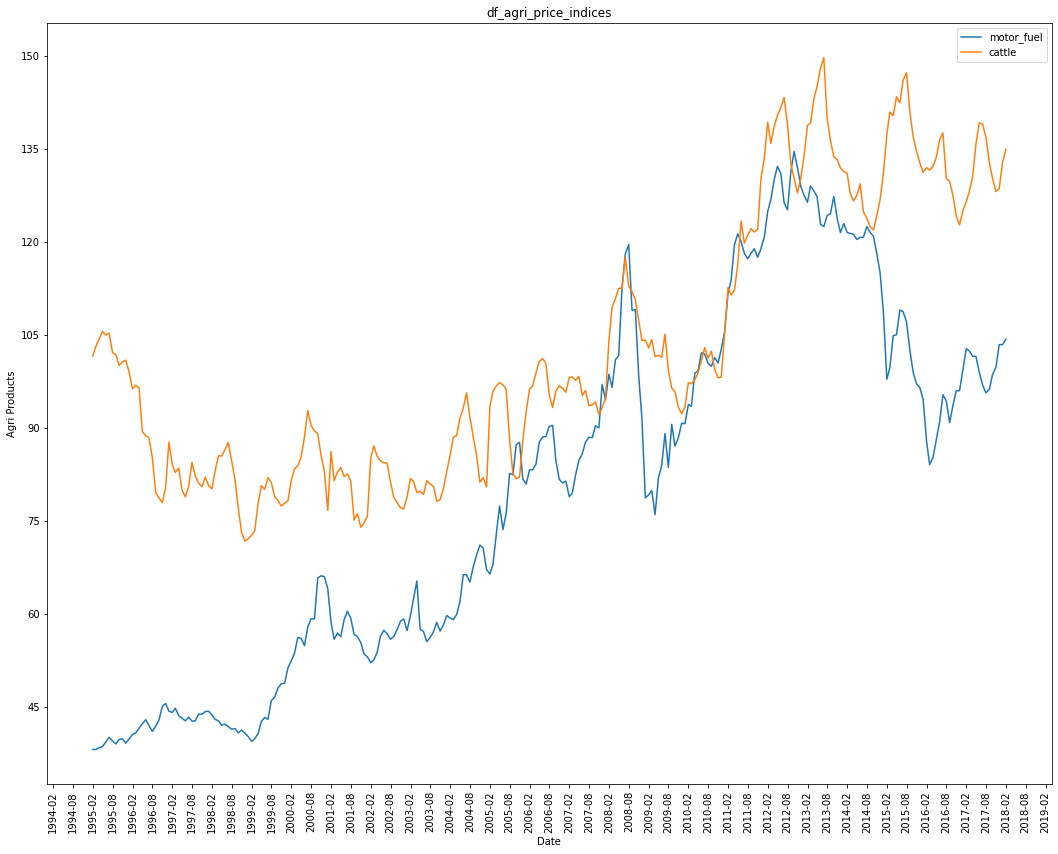

In [311]:
fig, ax = plt.subplots(figsize=(18, 14))

sns.lineplot(ax = ax, x='month', y='motor_fuel', data=df_agri_price_indices, label="motor_fuel")
#sns.lineplot(ax = ax, x='month', y='potatoes', data=df_agri_price_indices, label="potatoes")
sns.lineplot(ax = ax, x='month', y='cattle', data=df_agri_price_indices, label="cattle")

ax.set_title("df_agri_price_indices")
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))

ax.yaxis.set_major_locator(ticker.MaxNLocator())
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Agri Products')

plt.show()

### Rebase Check

Check that the rebasing from base 2000 to base 2010 has worked before we append the 1995-2010 data to the 2005-2018 data !!


https://data.cso.ie/table/AHM01 -> 1995-2010 data 

https://data.cso.ie/table/AHM03 -> 2005-2018 data

**Rebase technique:** https://stats.stackexchange.com/questions/154577/how-to-work-with-index-numbers#:~:text=Rebasing%20an%20index,multiplying%20the%20result%20by%20100.

In [230]:
start_year=2005
end_year=2010

In [231]:
data_2018_base_2010 = df_agri_price_2018_3[
    (df_agri_price_2018_3.index.year >= start_year) & 
    (df_agri_price_2018_3.index.year <= end_year)].motor_fuel

In [232]:
data_2010_rebased_2010 = df_agri_price_2010_3[
        (df_agri_price_2010_3.index.year >= start_year) & 
        (df_agri_price_2010_3.index.year <= end_year)].motor_fuel

In [233]:
data_2010_base_2000 = df_agri_price_2010_2[
    (df_agri_price_2010_2.index.year >= start_year) &
    (df_agri_price_2010_2.index.year <= end_year)]["energy_-_motor_fuels__input"]

In [234]:
len(data_2018_base_2010)

72

In [235]:
len(data_2010_rebased_2010)

72

In [236]:
len(data_2010_base_2000)

72

In [237]:
data_mixed_bases=pd.merge(data_2018_base_2010, data_2010_rebased_2010, right_index=True, left_index=True)

In [238]:
data_mixed_bases=pd.merge(data_mixed_bases, data_2010_base_2000, right_index=True, left_index=True)

In [239]:
data_mixed_bases.rename(columns = {'motor_fuel_x':'2018_motor_fuel_base_2010',
                                   'motor_fuel_y':'2010_motor_fuel_rebased_2010',
                                  'energy_-_motor_fuels__input':'2010_motor_fuel_base_2000'}
                        , inplace = True)

In [240]:
data_mixed_bases

,2018_motor_fuel_base_2010,2010_motor_fuel_rebased_2010,2010_motor_fuel_base_2000
month,,,
2005-01-31,71.220,66.440222,112.032
2005-02-28,71.240,67.979771,114.628
2005-03-31,72.550,72.871221,122.876
2005-04-30,79.050,77.423449,130.552
2005-05-31,78.720,73.607192,124.117
...,...,...,...
2010-08-31,101.543,99.949146,168.535
2010-09-30,101.414,101.367121,170.926
2010-10-31,100.873,100.487040,169.442


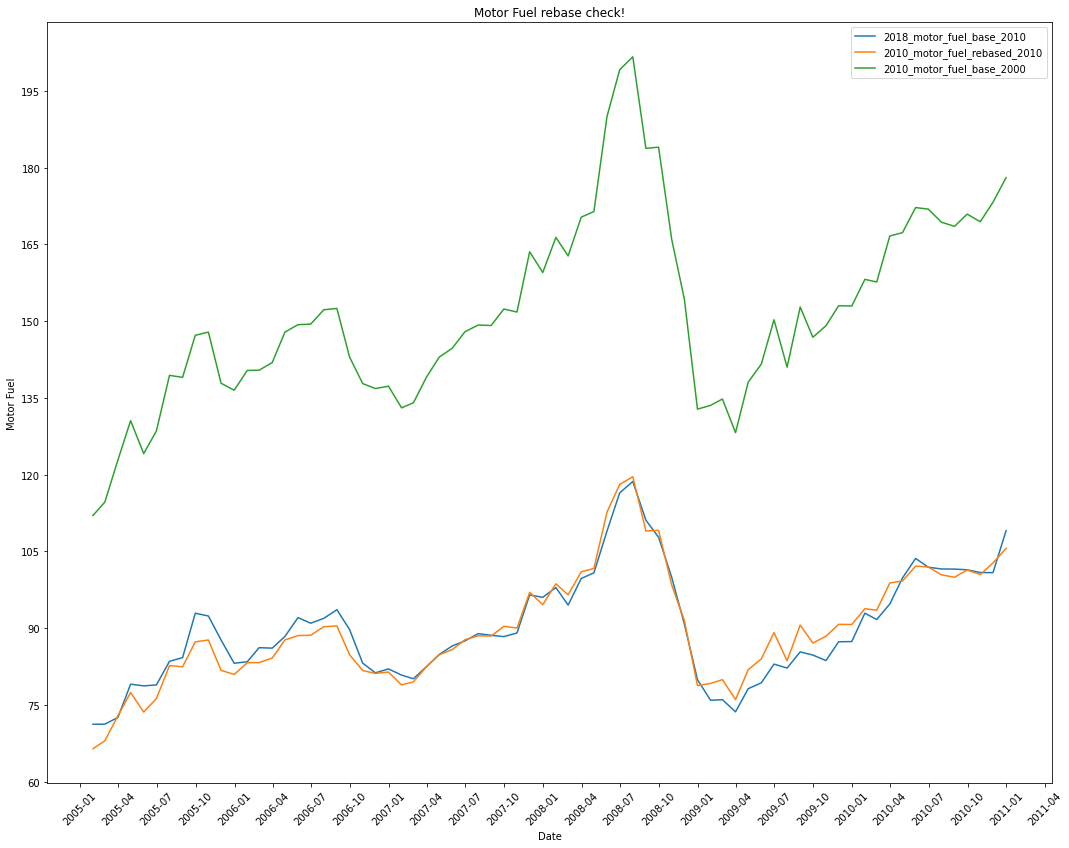

In [260]:
fig, ax = plt.subplots(figsize=(18, 14))

sns.lineplot(ax = ax, x='month', y='2018_motor_fuel_base_2010', data=data_mixed_bases, label="2018_motor_fuel_base_2010")
sns.lineplot(ax = ax, x='month', y='2010_motor_fuel_rebased_2010', data=data_mixed_bases, label="2010_motor_fuel_rebased_2010")
sns.lineplot(ax = ax, x='month', y='2010_motor_fuel_base_2000', data=data_mixed_bases, label="2010_motor_fuel_base_2000")

ax.set_title("Motor Fuel rebase check!")
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
# https://matplotlib.org/3.1.1/gallery/ticks_and_spines/tick-locators.html
ax.yaxis.set_major_locator(ticker.MaxNLocator())
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Motor Fuel')

plt.show()

rebasing looks like it has basically worked.. !

## df_agri_price_2022

https://data.cso.ie/table/AHM04

In [261]:
df_agri_price_2022 = pd.read_csv("data/ie/agri_price_index/AHM04_2014M01-2022M02.csv")

In [262]:
df_agri_price_2022

,Statistic,Month,Agricultural Product,UNIT,VALUE
0,Agricultural Input and Output Price Indices (B...,2014M01,Agricultural output price index,Base 2015=100,114.60
1,Agricultural Input and Output Price Indices (B...,2014M01,Crop output,Base 2015=100,102.72
2,Agricultural Input and Output Price Indices (B...,2014M01,Cereals including seeds,Base 2015=100,111.31
3,Agricultural Input and Output Price Indices (B...,2014M01,Fruit and Vegetables,Base 2015=100,99.06
4,Agricultural Input and Output Price Indices (B...,2014M01,Potatoes including seeds,Base 2015=100,91.51
...,...,...,...,...,...
4013,Agricultural Input and Output Price Indices (B...,2022M02,Compound feeding stuffs for pigs,Base 2015=100,144.17
4014,Agricultural Input and Output Price Indices (B...,2022M02,Compound feeding stuffs for poultry,Base 2015=100,118.17
4015,Agricultural Input and Output Price Indices (B...,2022M02,Other compound feeding stuffs,Base 2015=100,135.36
4016,Agricultural Input and Output Price Indices (B...,2022M02,Maintenance of materials and buildings,Base 2015=100,107.83


In [263]:
snake_case_columns(df_agri_price_2022)

In [264]:
df_agri_price_2022.statistic.unique()

array(['Agricultural Input and Output Price Indices (Base 2015=100)'],
      dtype=object)

In [265]:
df_agri_price_2022.unit.unique()

array(['Base 2015=100'], dtype=object)

In [266]:
sorted(df_agri_price_2022.agricultural_product.unique())

['Agricultural input price index',
 'Agricultural output price index',
 'Animal output',
 'Animal products',
 'Animals',
 'Calves',
 'Cattle',
 'Cattle excluding calves',
 'Cereals including seeds',
 'Compound feeding stuffs',
 'Compound feeding stuffs for calves',
 'Compound feeding stuffs for cattle excluding calves',
 'Compound feeding stuffs for pigs',
 'Compound feeding stuffs for poultry',
 'Compound fertilisers',
 'Crop output',
 'Eggs',
 'Electricity',
 'Energy',
 'Feeding stuffs',
 'Fertilisers',
 'Fruit and Vegetables',
 'Lubricants',
 'Maintenance of materials and buildings',
 'Milk',
 'Motor fuel',
 'NPK fertilisers',
 'Other compound feeding stuffs',
 'Other fertilisers',
 'Other goods and services',
 'PK fertilisers',
 'Pigs',
 'Plant protection products',
 'Potatoes including seeds',
 'Poultry',
 'Seeds',
 'Sheep',
 'Straight feeding stuffs',
 'Straight fertilisers',
 'Veterinary expenses',
 'Wool']

In [267]:
df_agri_price_2022 = df_agri_price_2022.drop(["statistic", "unit"], axis=1)

In [268]:
cso_date_to_datetime(df_agri_price_2022, "month")

In [269]:
df_agri_price_2022

,month,agricultural_product,value
0,2014-01-31,Agricultural output price index,114.60
1,2014-01-31,Crop output,102.72
2,2014-01-31,Cereals including seeds,111.31
3,2014-01-31,Fruit and Vegetables,99.06
4,2014-01-31,Potatoes including seeds,91.51
...,...,...,...
4013,2022-02-28,Compound feeding stuffs for pigs,144.17
4014,2022-02-28,Compound feeding stuffs for poultry,118.17
4015,2022-02-28,Other compound feeding stuffs,135.36
4016,2022-02-28,Maintenance of materials and buildings,107.83


In [270]:
df_agri_price_2022_2 = df_agri_price_2022.pivot(index='month', columns='agricultural_product', values='value')

In [271]:
snake_case_columns(df_agri_price_2022_2)

In [273]:
df_agri_price_2022_2.isnull().any()

agricultural_input_price_index                         False
agricultural_output_price_index                        False
animal_output                                          False
animal_products                                        False
animals                                                False
calves                                                 False
cattle                                                 False
cattle_excluding_calves                                False
cereals_including_seeds                                False
compound_feeding_stuffs                                False
compound_feeding_stuffs_for_calves                     False
compound_feeding_stuffs_for_cattle_excluding_calves    False
compound_feeding_stuffs_for_pigs                       False
compound_feeding_stuffs_for_poultry                    False
compound_fertilisers                                   False
crop_output                                            False
eggs                    

In [272]:
df_agri_price_2022_2.columns

Index(['agricultural_input_price_index', 'agricultural_output_price_index',
       'animal_output', 'animal_products', 'animals', 'calves', 'cattle',
       'cattle_excluding_calves', 'cereals_including_seeds',
       'compound_feeding_stuffs', 'compound_feeding_stuffs_for_calves',
       'compound_feeding_stuffs_for_cattle_excluding_calves',
       'compound_feeding_stuffs_for_pigs',
       'compound_feeding_stuffs_for_poultry', 'compound_fertilisers',
       'crop_output', 'eggs', 'electricity', 'energy', 'feeding_stuffs',
       'fertilisers', 'fruit_and_vegetables', 'lubricants',
       'maintenance_of_materials_and_buildings', 'milk', 'motor_fuel',
       'npk_fertilisers', 'other_compound_feeding_stuffs', 'other_fertilisers',
       'other_goods_and_services', 'pk_fertilisers', 'pigs',
       'plant_protection_products', 'potatoes_including_seeds', 'poultry',
       'seeds', 'sheep', 'straight_feeding_stuffs', 'straight_fertilisers',
       'veterinary_expenses', 'wool'],
      d

In [312]:
col_names_2022=sorted(df_agri_price_2022_2.columns)
col_names_2022

['agricultural_input_price_index',
 'agricultural_output_price_index',
 'animal_output',
 'animal_products',
 'animals',
 'calves',
 'cattle',
 'cattle_excluding_calves',
 'cereals_including_seeds',
 'compound_feeding_stuffs',
 'compound_feeding_stuffs_for_calves',
 'compound_feeding_stuffs_for_cattle_excluding_calves',
 'compound_feeding_stuffs_for_pigs',
 'compound_feeding_stuffs_for_poultry',
 'compound_fertilisers',
 'crop_output',
 'eggs',
 'electricity',
 'energy',
 'feeding_stuffs',
 'fertilisers',
 'fruit_and_vegetables',
 'lubricants',
 'maintenance_of_materials_and_buildings',
 'milk',
 'motor_fuel',
 'npk_fertilisers',
 'other_compound_feeding_stuffs',
 'other_fertilisers',
 'other_goods_and_services',
 'pigs',
 'pk_fertilisers',
 'plant_protection_products',
 'potatoes_including_seeds',
 'poultry',
 'seeds',
 'sheep',
 'straight_feeding_stuffs',
 'straight_fertilisers',
 'veterinary_expenses',
 'wool']

In [329]:
col_names_2022_new = {}
for i in range(len(col_names_2022)): 
    name = col_names_2022[i]
    colname = re.sub(r"[_]{1,2}input|_output|_including_a.i.", "", col_names_2022[i])
    #print(colname,":", name)
    if colname == 'cereals_including_seeds':
        col_names_2022_new[name] = 'cereals'
    elif colname == 'potatoes_including_seeds':
        col_names_2022_new[name] = 'potatoes'
    elif colname == 'fruit_and_vegetables':
        col_names_2022_new[name] = 'vegetables'

In [330]:
col_names_2022_new

{'cereals_including_seeds': 'cereals',
 'fruit_and_vegetables': 'vegetables',
 'potatoes_including_seeds': 'potatoes'}

In [331]:
df_agri_price_2022_3 = df_agri_price_2022_2.rename(col_names_2022_new, axis=1)

In [332]:
len(df_agri_price_indices.columns)

24

In [333]:
len(df_agri_price_2022_3.columns)

41

In [334]:
# intersection between newly created 1995-2018 data and 2014-2022 data
len(sorted(list(set(df_agri_price_2022_3.columns) & set(df_agri_price_indices.columns))))

24

In [339]:
# check that df_agri_price_2022_3 has exactly the same columns as df_agri_price_indices
# and that none are missing (empty list if none are missing)
temp1=(sorted(set(set(df_agri_price_2022_3.columns) & set(df_agri_price_indices.columns))))
temp2 = [x for x in df_agri_price_indices.columns if x not in temp1]
temp2

[]

In [345]:
df_agri_price_2022_3

,agricultural_input_price_index,agricultural_output_price_index,animal_output,animal_products,animals,calves,cattle,cattle_excluding_calves,cereals,compound_feeding_stuffs,...,pigs,plant_protection_products,potatoes,poultry,seeds,sheep,straight_feeding_stuffs,straight_fertilisers,veterinary_expenses,wool
month,,,,,,,,,,,,,,,,,,,,,
2014-01-31,106.42,114.60,116.16,147.09,95.65,96.07,93.54,93.52,111.31,114.96,...,108.10,99.90,91.51,103.67,113.18,85.45,116.24,98.74,99.15,77.03
2014-02-28,106.54,113.27,114.73,145.75,94.15,57.01,91.61,91.81,111.31,115.37,...,105.80,99.90,88.18,103.67,113.18,88.43,115.44,98.63,99.15,77.03
2014-03-31,103.63,111.40,112.82,141.01,94.13,61.74,90.99,91.15,111.31,107.55,...,103.77,99.90,78.16,104.20,102.76,97.37,112.51,99.35,99.15,77.03
2014-04-30,104.23,110.56,112.01,135.91,96.16,76.03,91.58,91.67,111.31,109.16,...,109.53,99.95,71.80,100.76,102.76,108.34,111.42,100.21,99.15,77.03
2014-05-31,104.53,110.02,111.41,131.02,98.40,79.51,92.90,92.97,111.31,109.49,...,115.54,100.06,70.41,100.76,102.76,112.92,111.90,101.49,99.15,81.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,117.72,119.93,117.66,132.57,107.77,143.83,107.04,106.83,154.54,123.62,...,101.46,105.28,160.86,101.00,112.59,130.85,133.31,122.74,110.33,13.55
2021-11-30,119.43,119.85,117.79,132.96,107.74,121.55,106.25,106.16,154.54,125.50,...,98.97,105.28,150.96,101.24,112.59,142.20,138.22,127.01,110.33,13.55
2021-12-31,123.85,124.58,123.50,143.87,110.00,109.04,108.63,108.62,154.54,127.75,...,99.06,105.28,150.96,103.95,112.59,147.48,141.91,159.79,110.33,13.55


In [344]:
df_agri_price_indices[df_agri_price_indices.index.year == 2010].mean()

feeding_stuffs                                         100.0
fertilisers                                            100.0
cereals                                                100.0
compound_feeding_stuffs_for_cattle_excluding_calves    100.0
compound_feeding_stuffs_for_pigs                       100.0
compound_feeding_stuffs_for_poultry                    100.0
npk_fertilisers                                        100.0
pk_fertilisers                                         100.0
electricity                                            100.0
motor_fuel                                             100.0
cattle                                                 100.0
milk                                                   100.0
other_goods_and_services                               100.0
pigs                                                   100.0
plant_protection_products                              100.0
potatoes                                               100.0
poultry                 

In [349]:
# df_agri_price_2022_3 data is based at 2015
# we want to rebase df_agri_price_indices to 2015 (from 2010) so we 
# can add on the missing three years 2019-2022 to df_agri_price_indices

# https://stats.stackexchange.com/questions/154577/how-to-work-with-index-numbers#:~:text=Rebasing%20an%20index,multiplying%20the%20result%20by%20100.
df_agri_price_indices_rebased = df_agri_price_indices /df_agri_price_indices[df_agri_price_indices.index.year == 2015].mean() * 100

In [350]:
df_agri_price_indices_rebased

,feeding_stuffs,fertilisers,cereals,compound_feeding_stuffs_for_cattle_excluding_calves,compound_feeding_stuffs_for_pigs,compound_feeding_stuffs_for_poultry,npk_fertilisers,pk_fertilisers,electricity,motor_fuel,...,plant_protection_products,potatoes,poultry,seeds,sheep,straight_feeding_stuffs,straight_fertilisers,crop_output,vegetables,veterinary_expenses
month,,,,,,,,,,,,,,,,,,,,,
1995-01-31,69.382178,47.622665,86.916468,74.141849,61.336499,62.495503,48.157600,42.962708,47.244421,37.433436,...,92.249395,61.930148,69.030390,69.448368,68.496625,73.244369,47.520581,72.741570,65.887560,62.426140
1995-02-28,69.044716,48.530725,86.916468,74.565517,60.594525,60.912537,49.005972,43.454835,47.244421,37.433436,...,92.249395,85.277616,69.244771,69.448368,68.940584,73.384953,48.879750,77.907478,68.629787,62.499669
1995-03-31,69.719640,48.228038,86.916468,74.494905,62.944109,61.798998,48.606738,43.110346,47.244421,37.724520,...,93.408550,83.694736,69.316231,69.448368,68.116088,73.455245,48.728731,77.767859,69.000358,62.499669
1995-04-30,70.057102,48.328934,86.916468,74.777350,63.067771,62.432184,48.806355,43.011920,47.244421,37.899171,...,93.988127,82.111857,70.030831,69.448368,66.403672,74.228458,48.628052,77.279192,68.555673,62.940843
1995-05-31,69.854625,48.278486,86.916468,75.130407,60.718187,63.065371,48.706546,42.716644,47.244421,38.655990,...,94.374512,73.059767,70.602511,69.448368,60.632197,74.158166,48.678392,76.092430,70.112072,62.940843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-30,96.619958,77.973188,105.304331,97.589221,96.345075,95.086391,79.515964,87.814967,94.621581,96.848309,...,103.573212,114.662869,99.913952,99.355924,94.208412,97.581971,74.154960,105.996864,103.094518,102.290606
2017-10-31,96.797911,79.477833,105.304331,97.865285,96.345075,95.086391,80.886673,88.079327,96.893370,97.946783,...,103.573212,100.257986,99.399446,99.298380,91.998484,97.894858,75.953369,103.649178,102.978049,102.290606
2017-11-30,97.181063,79.988382,105.304331,98.319313,96.345075,95.086391,81.294493,88.166813,98.773790,101.560262,...,103.573212,85.745677,98.839464,99.298380,95.690792,98.097912,76.626978,101.209807,102.657759,102.290606


## df_agri_price_indices_final

In this section the series for the full date range is built (1995-2022).

In [371]:
len(df_agri_price_indices_rebased.columns)

24

In [372]:
# intersection between newly created 1995-2018 data and 2014-2022 data
len(sorted(list(set(df_agri_price_2022_3.columns) & set(df_agri_price_indices_rebased.columns))))

24

In [373]:
df_tmp_2 = df_agri_price_indices_rebased[df_agri_price_indices_rebased.index.year < 2018]

In [374]:
df_tmp_3 = df_agri_price_2022_3[df_agri_price_2022_3.index.year >= 2018]

In [375]:
print("df_tmp_2 min date","  :",df_tmp_2.index.min())
print("df_tmp_2 max date","  :",df_tmp_2.index.max())

print("df_tmp_3 min date","  :",df_tmp_3.index.min())
print("df_tmp_3 max date","  :",df_tmp_3.index.max())

df_tmp_2 min date   : 1995-01-31 00:00:00
df_tmp_2 max date   : 2017-12-31 00:00:00
df_tmp_3 min date   : 2018-01-31 00:00:00
df_tmp_3 max date   : 2022-02-28 00:00:00


In [376]:
df_agri_price_indices_final = df_tmp_2.append(df_tmp_3)

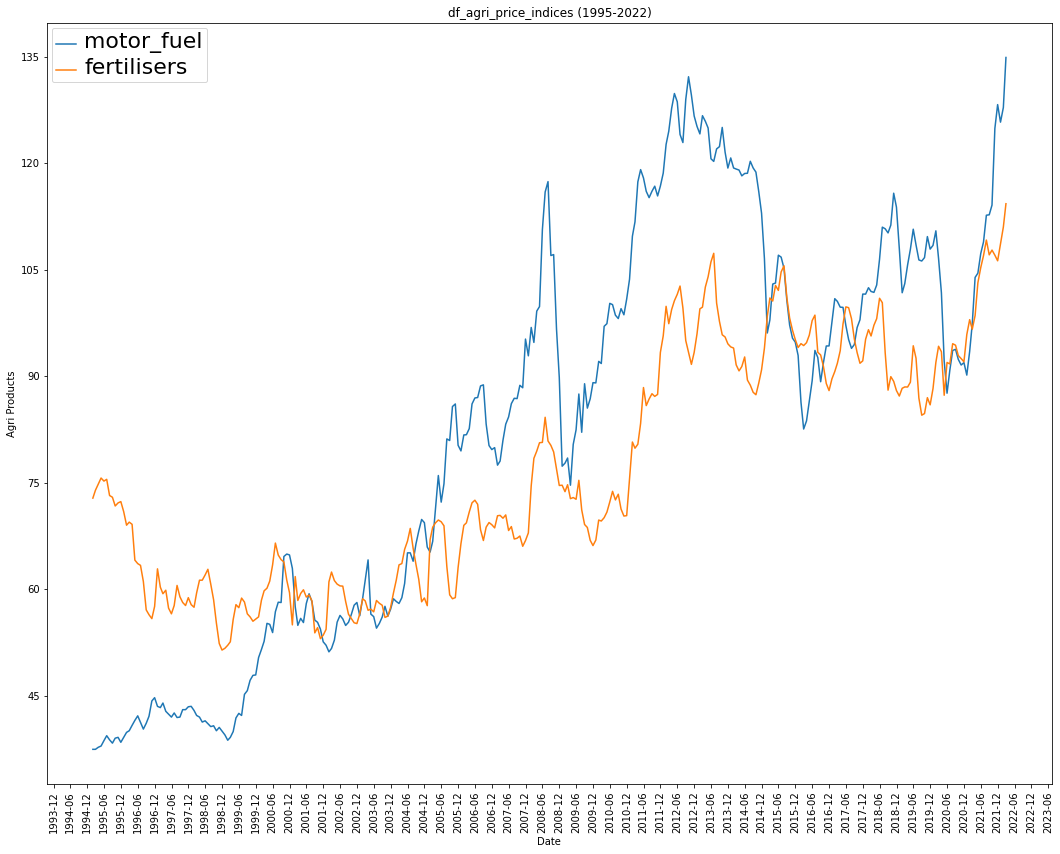

In [382]:
fig, ax = plt.subplots(figsize=(18, 14))

sns.lineplot(ax = ax, x='month', y='motor_fuel', data=df_agri_price_indices_final, label="motor_fuel")
#sns.lineplot(ax = ax, x='month', y='potatoes', data=df_agri_price_indices, label="potatoes")
sns.lineplot(ax = ax, x='month', y='cattle', data=df_agri_price_indices_final, label="fertilisers")

ax.set_title("df_agri_price_indices (1995-2022)")
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))

ax.yaxis.set_major_locator(ticker.MaxNLocator())
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Agri Products')

# https://stackoverflow.com/questions/44880444/how-to-increase-the-font-size-of-the-legend-in-my-seaborn-plot
plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text

plt.show()

## final output

In [377]:
df_agri_price_indices_final

,feeding_stuffs,fertilisers,cereals,compound_feeding_stuffs_for_cattle_excluding_calves,compound_feeding_stuffs_for_pigs,compound_feeding_stuffs_for_poultry,npk_fertilisers,pk_fertilisers,electricity,motor_fuel,...,compound_feeding_stuffs,compound_feeding_stuffs_for_calves,compound_fertilisers,eggs,energy,lubricants,maintenance_of_materials_and_buildings,other_compound_feeding_stuffs,other_fertilisers,wool
month,,,,,,,,,,,,,,,,,,,,,
1995-01-31,69.382178,47.622665,86.916468,74.141849,61.336499,62.495503,48.157600,42.962708,47.244421,37.433436,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-02-28,69.044716,48.530725,86.916468,74.565517,60.594525,60.912537,49.005972,43.454835,47.244421,37.433436,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-03-31,69.719640,48.228038,86.916468,74.494905,62.944109,61.798998,48.606738,43.110346,47.244421,37.724520,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-04-30,70.057102,48.328934,86.916468,74.777350,63.067771,62.432184,48.806355,43.011920,47.244421,37.899171,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-05-31,69.854625,48.278486,86.916468,75.130407,60.718187,63.065371,48.706546,42.716644,47.244421,38.655990,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,124.090000,120.810000,154.540000,124.810000,130.480000,112.930000,120.070000,120.520000,127.040000,124.890000,...,123.62,124.40,120.08,105.08,124.96,112.62,106.77,123.33,114.29,13.55
2021-11-30,126.120000,123.150000,154.540000,126.650000,134.580000,112.920000,121.370000,124.760000,133.060000,128.250000,...,125.50,126.10,121.45,105.55,128.83,112.62,107.38,124.35,114.29,13.55
2021-12-31,128.440000,147.670000,154.540000,129.950000,136.030000,113.220000,142.810000,137.150000,134.740000,125.780000,...,127.75,127.24,142.67,107.44,127.41,112.31,107.61,127.15,114.29,13.55
